In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 文本向量化

一段文本是典型的非结构化的数据，如果要识别某个文本是某个分类，当应用某分类模型时，因为模型输入的是向量，所以需要将文本转换成向量。

## 文本分词(text segmentation)

In [2]:
"Penny bought bright blue fishes".split(" ")

['Penny', 'bought', 'bright', 'blue', 'fishes']

## 中文分词

> 需要按照`jieba`包
>
> ```pip install jieba```

In [4]:
import jieba

jieba.lcut('我来到天津工业大学')

['我', '来到', '天津工业大学']

In [5]:
jieba.lcut('我来到天津工业大学', cut_all=True)

['我', '来到', '天津', '天津工业大学', '工业', '业大', '大学']

In [7]:
jieba.lcut_for_search("我来到天津工业大学")

['我', '来到', '天津', '工业', '业大', '大学', '天津工业大学']

In [9]:
texts = [
  '翠花买了浅蓝色的鱼',
  '翠花买了浅蓝橙色的鱼',
  '猫在商店吃了一条鱼',
  '翠花去了商店。翠花买了一只虫子。翠花看到一条鱼',
  '它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫',
  '这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。',
  '翠花是鱼'  
]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, token_pattern=None)

X = count_vectorizer.fit_transform(texts)

X

<7x34 sparse matrix of type '<class 'numpy.int64'>'
	with 66 stored elements in Compressed Sparse Row format>

In [11]:
count_vectorizer.get_feature_names_out()

array(['。', '一只', '一声', '一条', '买', '了', '仍然', '去', '只', '叫', '吃', '和',
       '商店', '喵', '在', '它', '对', '店里', '是', '橙色', '正在', '浅蓝', '浅蓝色', '猫',
       '现在', '的', '看到', '翠花', '虫子', '这', '这个', '这条', '鱼', '，'],
      dtype=object)

In [12]:
with pd.option_context('display.max_columns', None): 
    display(pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names_out()))

,。,一只,一声,一条,买,了,仍然,去,只,叫,吃,和,商店,喵,在,它,对,店里,是,橙色,正在,浅蓝,浅蓝色,猫,现在,的,看到,翠花,虫子,这,这个,这条,鱼,，
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,1,0,1,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,0,0,1,0
4,0,0,1,0,0,1,1,0,1,2,0,1,0,4,1,2,2,0,0,0,0,0,0,0,1,0,0,0,2,1,1,1,1,1
5,3,0,0,0,0,0,0,0,3,1,0,0,0,2,1,0,1,1,1,1,1,0,0,3,0,1,0,0,0,3,0,1,2,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


这称之为 **词袋(Bag of Words)** 文本表示法

### n-gram分词法

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(analyzer="char_wb", ngram_range=(2,2))
vect.fit_transform(['我来到天津工业大学'])
vect.get_feature_names_out()

array([' 我', '业大', '到天', '大学', '天津', '学 ', '工业', '我来', '来到', '津工'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(analyzer="char_wb", ngram_range=(1,3))
vect.fit_transform(['我来到天津工业大学'])
vect.get_feature_names_out()

array([' ', ' 我', ' 我来', '业', '业大', '业大学', '到', '到天', '到天津', '大', '大学',
       '大学 ', '天', '天津', '天津工', '学', '学 ', '工', '工业', '工业大', '我', '我来',
       '我来到', '来', '来到', '来到天', '津', '津工', '津工业'], dtype=object)

"char_wb"分析器还会在单词边界处添加特殊标记，这有助于保留词汇的边界信息，在处理包含英文或混合语言的文本时特别有用。这种技术常用于文本分类、相似度计算等自然语言处理任务中。

### 停用词(stop words)

In [15]:
chinese_stopwords = [
    "、", "。", "〈", "〉", "《", "》", "︿", "！", "＃", "＄", "％", "＆", "（", "）", "＊", "＋", "，", "０", "１", "２", "３", "４", "５", "６", "７", "８", "９", "：", "；", "＜", "＞", "？", "＠", "［", "］", "｛", "｜", "｝", "～", "￥",
    "一", "一些", "一何", "一切", "一则", "一方面", "一旦", "一来", "一样", "一般", "一转眼", "七", "万一", "三", "上", "上下", "下", "不", "不仅", "不但", "不光", "不单", "不只", "不外乎", "不如", "不妨", "不尽", "不尽然", "不得", "不怕", "不惟", "不成", "不拘", "不料", "不是", "不比", "不然", "不独", "不管", "不至于", "不若", "不论", "不过", 
    "不问", "与", "与其", "与其说", "与否", "与此同时", "且", "且不说", "且说", "两者", "个", "个别", "中", "临", "为", "为了", "为什么", "为何", "为止", "为此", "为着", "乃", "乃至", "乃至于", "么", "之", "之一", "之所以", "之类", "乌乎", "乎", "乘", "九", "也", "也好", "也罢", "了", "二", "二来", "于", "于是", "于是乎", "云云", "云尔", "五", "些", "亦", "人", "人们", "人家", 
    "什", "什么", "什么样", "今", "介于", "仍", "仍旧", "从", "从此", "从而", "他", "他人", "他们", "他们们", "以", "以上", "以为", "以便", "以免", "以及", "以故", "以期", "以来", "以至", "以至于", "以致", "们", "任", "任何", "任凭", "会", "似的", "但", "但凡", "但是", "何", "何以", "何况", "何处", "何时", "余外", "作为", "你", "你们", "使", "使得", "例如", "依", "依据", "依照", 
    "便于", "俺", "俺们", "倘", "倘使", "倘或", "倘然", "倘若", "借", "假使", "假如", "假若", "做", "像", "儿", "先不先", "光是", "全体", "全部", "八", "六", "兮", "共", "关于", "关于具体地说", "其", "其一", "其中", "其二", "其他", "其余", "其它", "其次", "具体地说", "具体说来", "兼", "兼之", "内", "再", "再其次", "再则", "再有", "再者", "再者说", "再说", "冒", "冲", "况且", "几", "几时", 
    "凡", "凡是", "凭", "凭借", "出于", "出来", "分", "分别", "则", "则甚", "别", "别人", "别处", "别是", "别的", "别管", "别说", "到", "前", "前后", "前此", "前者", "加之", "加以", "即", "即令", "即使", "即便", "即如", "即或", "即若", "却", "去", "又", "又及", "及", "及其", "及至", "反之", "反而", "反过来", "反过来说", "受到", "另", "另一方面", "另外", "另悉", "只", "只当", "只怕", "只是", 
    "只有", "只消", "只要", "只限", "叫", "叮咚", "可", "可以", "可是",  "各", "各个", "各位", "各种", "各自", "同", "同时", "后", "后者", "向", "向使", "向着", "吓", "吗", "否则", "吧", "吧哒", "含", "吱", "呀", "呃", "呕", "呗", "呜", "呜呼", "呢", "呵", "呵呵", "呸", "呼哧", "咋", "和", "咚", "咦", "咧", "咱", "咱们", "咳", "哇", "哈", 
    "哈哈", "哉", "哎", "哎呀", "哎哟", "哗", "哟", "哦", "哩", "哪", "哪个", "哪些", "哪儿", "哪怕", "哪样", "哪边", "哪里", "哼", "哼唷", "唉", "唯有", "啊", "啐", "啥", "啦", "啪", "啷", "喂", "喏", "喔", "唷", "喽", "嗡", "嗡嗡", "嗬", "嗯", "嗳", "嘎", "嘎登", "嘘", "嘛", "嘻", "嘿", "嘿嘿", "四", "因", "因为", "因了", "因此", 
    "因着", "因而", "固然", "在", "在下", "在于", "地", "基于", "处在", "多", "多么", "多少", "大", "大家", "她", "她们", "好", "如", "如上", "如上所述", "如下", "如何", "如其", "如同", "如是", "如果", "如此", "如若", "孰料", "孰知", "宁", "宁可", "宁愿", "宁肯", "它", "它们", "对", "对于", "对待", "对方", "对比", "将", "小", "尔", "尔后", "尔尔", "尚且", "就", "就是", 
    "就是了", "就是说", "就算", "就要", "尽", "尽管", "尽管如此", "岂但", "己", "已", "已矣", "巴", "巴巴", "年", "并", "并且", "庶乎", "庶几", "开外", "归", "归齐", "当", "当地", "当然", "当着", "彼", "彼时", "彼此", "往", "待", "很", "得", "得了", "怎", "怎么", "怎么办", "怎么样", "怎奈", "怎样", "总之", "总的来看", "总的来说", "总的说来", "总而言之", "恰恰相反", "您", "惟其", "慢说", "我", 
    "我们", "或", "或则", "或是", "或曰", "或者", "截至", "所", "所以", "所在", "所幸", "所有", "才", "才能", "打", "打从", "把", "抑或", "拿", "按", "按照", "换句话说", "换言之", "据", "据此", "接着", "故", "故此", "故而", "旁人", "无", "无宁", "无论", "既", "既往", "既是", "既然", "日", "时", "时候", "是", "是以", "是的", "更", "曾", "替", "替代", "最", "月", "有", 
    "有些", "有关", "有及", "有时", "有的", "望", "朝", "朝着", "本", "本人", "本地", "本着", "本身", "来", "来着", "来自", "来说", "极了", "果然", "果真", "某", "某个", "某些", "某某", "根据", "欤", "正值", "正如", "正巧", "正是", "此", "此地", "此处", "此外", "此时", "此次", "此间", "毋宁", "每", "每当", "比", "比及", "比如", "比方", "没奈何", "沿", "沿着",  "焉", "然则", 
    "然后", "然而", "照", "照着", "犹且", "犹自", "甚且", "甚么", "甚或", "甚而", "甚至", "甚至于", "用", "用来", "由", "由于", "由是", "由此", "的", "的确", "的话", "直到", "相对而言", "省得", "看", "眨眼", "着", "着呢", "矣", "矣乎", "矣哉", "离", "秒", "竟", "竟而", "第", "等", "等到", "等等", "简言之", "管", "类如", "紧接着", "纵", "纵令", "纵使", "纵然", "经", "经过", "结果", 
    "给", "继之", "继后", "继而", "综上所述", "罢了", "者", "而", "而且", "而况", "而后", "而外", "而已", "而是", "而言", "能", "能否", "腾", "自", "自个儿", "自从", "自各儿", "自后", "自家", "自己", "自打", "自身", "至", "至于", "至今", "至若", "致", "般的", "若", "若夫", "若是", "若果", "若非", "莫", "莫不然", "莫如", "莫若", "虽", "虽则", "虽然", "虽说", "被", "要", "要不", "要不是", "要不然", 
    "要么", "要是", "譬喻", "譬如", "让", "许多", "论", "诚如", "诚然", "该", "说", "说来", "请", "诸", "诸位", "诸如", "谁", "谁人", "谁料", "谁知", "贼死", "赖以", "赶", "起",  "趁", "趁着", "越是", "距", "跟", "较", "较之", "边", "过", "还", "还是", "还有", "还要", "这", "这一来", "这个", "这么", "这么些", "这么样", "这么点儿", "这些", "这会儿", 
    "这儿", "这就是说", "这时", "这样", "这次", "这般", "这边", "这里", "进而", "连", "连同", "逐步", "通过", "遵循", "遵照", "那", "那个", "那么", "那么些", "那么样", "那些", "那会儿", "那儿", "那时", "那样", "那般", "那边", "那里", "都", "鄙人", "鉴于", "针对", "阿", "除", "除了", "除外", "除开", "除此之外", "除非", "随", "随后", "随时", "随着", "难道说", "零",  "靠", "顺", "顺着", "首先", 
]

### 计数向量

In [16]:
count_vectorizer = CountVectorizer(stop_words=chinese_stopwords, tokenizer=jieba.lcut, token_pattern=None)
word_counts = count_vectorizer.fit_transform(texts)

with pd.option_context('display.max_columns', None): 
    display(pd.DataFrame(word_counts.toarray(), columns=count_vectorizer.get_feature_names_out()))

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,1
4,0,1,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,2,1,1
5,0,0,0,0,0,0,0,2,1,1,1,0,0,3,0,0,0,0,1,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


这部分代码做了以下几件事：

word_counts.toarray() 将稀疏矩阵转换为密集数组
count_vectorizer.get_feature_names_out() 获取特征名称（即词汇表）
pd.DataFrame(...) 创建pandas DataFrame，行为文档，列为词汇，单元格值为词频
pd.option_context('display.max_columns', None) 设置pandas选项以显示所有列（不省略列）
display(...) 显示DataFrame

### 计算词频(term frequency)


<center><img src="attachment:33a86806-0deb-43f6-970c-8abaffd367be.png"></center>



#### **词频**（term frequency，tf）
单词$w$在文档$d$中出出现的频率。
$$\text{tf}_{w,d}=\frac{n_{w,d}}{ \sum_w n_{w,d} }$$

以上式子中 $n_{w,d}$是词$w$在文档$d$中的出现次数，而分母$\sum_w n_{w,d}$则是文件$d$中所有字词的出现次数之和。


#### **逆向文档频率**（inverse document frequency，idf）
作为一个词的区分程度的度量。

$$
\mathrm{idf}_w = \log \frac{N}{\mathrm{df}_w + 1}
$$

其中$N$是数据集中文档总数，$\mathrm{df}_w$出现词$w$的文档的数量。

#### **TF-IDF**
考虑词频和该词的区分度

\begin{equation*}
\mathrm{tfidf}_{w, d} = \mathrm{tf}_{w,d} \cdot \mathrm{idf}_w 
\end{equation*}



### 文档相似度

给定两个属性文档向量$\mathbf{a}$和$\mathbf{b}$，其余弦相似性$\theta$由点积和向量长度给出
$$
\text{similarity}=\cos(\theta)={\mathbf{a} \cdot \mathbf{b} \over \|\mathbf{a}\|\|\mathbf{b}\|}
$$

In [17]:
word_counts.sum(axis=1)

matrix([[ 4],
        [ 5],
        [ 5],
        [10],
        [11],
        [11],
        [ 2]])

In [18]:
count_vectorizer.get_feature_names_out()

array(['一只', '一声', '一条', '买', '仍然', '吃', '商店', '喵', '店里', '橙色', '正在',
       '浅蓝', '浅蓝色', '猫', '现在', '看到', '翠花', '虫子', '这条', '鱼'], dtype=object)

In [19]:
word_tf1 = word_counts / word_counts.sum(axis=1)

with pd.option_context('display.max_columns', None): 
    display(pd.DataFrame(word_tf1.toarray(), columns=count_vectorizer.get_feature_names_out()).round(2))

,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.0,0.00,0.0,0.25,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.25,0.00,0.00,0.0,0.25,0.00,0.00,0.25
1,0.0,0.00,0.0,0.20,0.00,0.0,0.0,0.00,0.00,0.20,0.00,0.2,0.00,0.00,0.00,0.0,0.20,0.00,0.00,0.20
2,0.0,0.00,0.2,0.00,0.00,0.2,0.2,0.00,0.00,0.00,0.00,0.0,0.00,0.20,0.00,0.0,0.00,0.00,0.00,0.20
3,0.1,0.00,0.1,0.10,0.00,0.0,0.1,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.1,0.30,0.10,0.00,0.10
4,0.0,0.09,0.0,0.00,0.09,0.0,0.0,0.36,0.00,0.00,0.00,0.0,0.00,0.00,0.09,0.0,0.00,0.18,0.09,0.09
5,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.18,0.09,0.09,0.09,0.0,0.00,0.27,0.00,0.0,0.00,0.00,0.09,0.18
6,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.50,0.00,0.00,0.50


use_idf=False: 关闭IDF（逆文档频率）部分，只计算词频（TF），这意味着不会考虑词汇在整个语料库中的稀有程度
norm='l1': 使用L1范数进行归一化，这使得每个文档中所有词项的权重之和为1，即得到的是相对词频

这种方法适合需要关注词汇在单个文档中的相对重要性，而不考虑其在整个语料库中分布情况的场景。例如，在某些文本相似度计算或主题建模中，我们只关心词汇在当前文档中的分布情况。

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(use_idf=False, norm='l1', stop_words=chinese_stopwords, tokenizer=jieba.lcut, token_pattern=None)

word_tf2 = tf_vectorizer.fit_transform(texts)

with pd.option_context('display.max_columns', None): 
    display(pd.DataFrame(word_tf2.toarray(), columns=tf_vectorizer.get_feature_names_out()).round(2))


,一只,一声,一条,买,仍然,吃,商店,喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.0,0.00,0.0,0.25,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.25,0.00,0.00,0.0,0.25,0.00,0.00,0.25
1,0.0,0.00,0.0,0.20,0.00,0.0,0.0,0.00,0.00,0.20,0.00,0.2,0.00,0.00,0.00,0.0,0.20,0.00,0.00,0.20
2,0.0,0.00,0.2,0.00,0.00,0.2,0.2,0.00,0.00,0.00,0.00,0.0,0.00,0.20,0.00,0.0,0.00,0.00,0.00,0.20
3,0.1,0.00,0.1,0.10,0.00,0.0,0.1,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.1,0.30,0.10,0.00,0.10
4,0.0,0.09,0.0,0.00,0.09,0.0,0.0,0.36,0.00,0.00,0.00,0.0,0.00,0.00,0.09,0.0,0.00,0.18,0.09,0.09
5,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.18,0.09,0.09,0.09,0.0,0.00,0.27,0.00,0.0,0.00,0.00,0.09,0.18
6,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.50,0.00,0.00,0.50


词袋法和TF-IDF法的曼哈顿距离

In [21]:
np.abs(word_tf2 - word_tf1).sum()

np.float64(5.551115123125783e-17)

另外，在前面分词中`喵喵`是一个词，因此需要给`jieba`说明这是一个词

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

jieba.suggest_freq('喵喵', True)

tfidf_vectorizer = TfidfVectorizer(use_idf=False, norm='l1', stop_words=chinese_stopwords, 
                                   tokenizer=jieba.lcut, token_pattern=None)

X = tfidf_vectorizer.fit_transform(texts)

with pd.option_context('display.max_columns', None): 
    display(pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).round(2))
   

,一只,一声,一条,买,仍然,吃,商店,喵喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.0,0.00,0.0,0.25,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.0,0.25,0.00,0.00,0.25
1,0.0,0.00,0.0,0.20,0.00,0.0,0.0,0.00,0.0,0.2,0.0,0.2,0.00,0.0,0.00,0.0,0.20,0.00,0.00,0.20
2,0.0,0.00,0.2,0.00,0.00,0.2,0.2,0.00,0.0,0.0,0.0,0.0,0.00,0.2,0.00,0.0,0.00,0.00,0.00,0.20
3,0.1,0.00,0.1,0.10,0.00,0.0,0.1,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.1,0.30,0.10,0.00,0.10
4,0.0,0.11,0.0,0.00,0.11,0.0,0.0,0.22,0.0,0.0,0.0,0.0,0.00,0.0,0.11,0.0,0.00,0.22,0.11,0.11
5,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.10,0.1,0.1,0.1,0.0,0.00,0.3,0.00,0.0,0.00,0.00,0.10,0.20
6,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.50,0.00,0.00,0.50


In [23]:
idf_vectorizer = TfidfVectorizer(use_idf=True, norm='l1', stop_words=chinese_stopwords, 
                                 tokenizer=jieba.lcut, token_pattern=None)
X = idf_vectorizer.fit_transform(texts)

df = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names_out())

with pd.option_context('display.max_columns', None): 
    display(df.round(2))

,一只,一声,一条,买,仍然,吃,商店,喵喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.22,0.00,0.00,0.15
1,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.28,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.12
2,0.00,0.00,0.21,0.00,0.00,0.26,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.11
3,0.13,0.00,0.11,0.10,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.25,0.11,0.00,0.06
4,0.00,0.13,0.00,0.00,0.13,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.22,0.11,0.06
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.13,0.11,0.13,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.11,0.11
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.00,0.40


一般向量单位化中采用$L2$

L1标准化：

更适合词频统计，因为词频向量的元素和可以看作文档长度
常用于文档词频向量，使不同长度的文档在词频比例上可比
L2标准化：

更常用在机器学习算法中
有助于避免某些特征因数值较大而主导模型训练
保持了向量的方向信息，同时控制了大小

In [24]:
idf_vectorizer = TfidfVectorizer(use_idf=False, norm='l2', stop_words=chinese_stopwords, 
                                 tokenizer=jieba.lcut, token_pattern=None)

X = idf_vectorizer.fit_transform(texts)

df1 = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names_out())
with pd.option_context('display.max_columns', None): 
    display(df1.round(2))

,一只,一声,一条,买,仍然,吃,商店,喵喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.50,0.00,0.00,0.50
1,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.0,0.00,0.00,0.00,0.45,0.00,0.00,0.45
2,0.00,0.00,0.45,0.00,0.00,0.45,0.45,0.00,0.00,0.00,0.00,0.00,0.0,0.45,0.00,0.00,0.00,0.00,0.00,0.45
3,0.25,0.00,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.25,0.75,0.25,0.00,0.25
4,0.00,0.28,0.00,0.00,0.28,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.0,0.00,0.28,0.00,0.00,0.55,0.28,0.28
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.24,0.24,0.24,0.00,0.0,0.71,0.00,0.00,0.00,0.00,0.24,0.47
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.71,0.00,0.00,0.71


开启IDF后

In [25]:
idf_vectorizer = TfidfVectorizer(use_idf=True, norm='l2', stop_words=chinese_stopwords, 
                                 tokenizer=jieba.lcut, token_pattern=None)

X = idf_vectorizer.fit_transform(texts)

df2 = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names_out())
with pd.option_context('display.max_columns', None): 
    display(df2.round(2))

,一只,一声,一条,买,仍然,吃,商店,喵喵,店里,橙色,正在,浅蓝,浅蓝色,猫,现在,看到,翠花,虫子,这条,鱼
0,0.00,0.00,0.00,0.49,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.7,0.00,0.00,0.00,0.43,0.00,0.00,0.29
1,0.00,0.00,0.00,0.43,0.00,0.00,0.00,0.00,0.0,0.50,0.0,0.6,0.0,0.00,0.00,0.00,0.37,0.00,0.00,0.25
2,0.00,0.00,0.46,0.00,0.00,0.56,0.46,0.00,0.0,0.00,0.0,0.0,0.0,0.46,0.00,0.00,0.00,0.00,0.00,0.23
3,0.35,0.00,0.29,0.25,0.00,0.00,0.29,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.35,0.65,0.29,0.00,0.15
4,0.00,0.33,0.00,0.00,0.33,0.00,0.00,0.54,0.0,0.00,0.0,0.0,0.0,0.00,0.33,0.00,0.00,0.54,0.27,0.14
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.3,0.25,0.3,0.0,0.0,0.75,0.00,0.00,0.00,0.00,0.25,0.25
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.83,0.00,0.00,0.56


In [26]:
df2.shape

(7, 20)

0 翠花买了浅蓝色的鱼
1 翠花买了浅蓝橙色的鱼
2 猫在商店吃了一条鱼
3 翠花去了商店。翠花买了一只虫子。翠花看到一条鱼
4 它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫
5 这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。
6 翠花是鱼


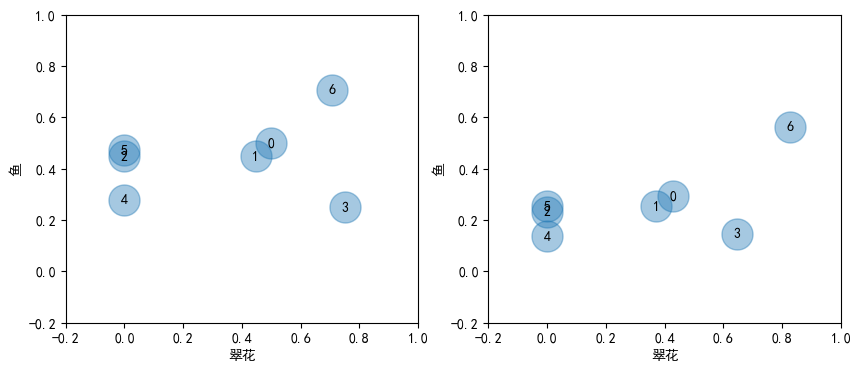

In [29]:
for i in range(len(texts)):
    print(i, texts[i])

def plot_text(ax, df):
    ax.scatter(df.翠花, df.鱼, s=500, alpha=0.4)
    for i in range(len(texts)):
        ax.annotate(str(i), (df.翠花[i], df.鱼[i]), ha='center', va='center')
    ax.set_xlabel("翠花")
    ax.set_ylabel("鱼")
    ax.set_xlim(-0.2, 1); ax.set_ylim(-0.2, 1)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_text(axes[0], df1)
plot_text(axes[1], df2)

选出按照词频(term frequency)最大的3组特征(feature)

In [30]:
vectorizer = TfidfVectorizer(use_idf=True, max_features=3, stop_words=chinese_stopwords, 
                             tokenizer=jieba.lcut, token_pattern=None)
X = vectorizer.fit_transform(texts)


df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df

,猫,翠花,鱼
0,0.000000,0.826823,0.562463
1,0.000000,0.826823,0.562463
2,0.892693,0.000000,0.450666
3,0.000000,0.975241,0.221143
4,0.000000,0.000000,1.000000
5,0.947762,0.000000,0.318978
6,0.000000,0.826823,0.562463


In [31]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)
df['category'] = km.labels_
df['text'] = texts

with pd.option_context('display.max_columns', None): 
    display(df.round(2))

,猫,翠花,鱼,category,text
0,0.00,0.83,0.56,0,翠花买了浅蓝色的鱼
1,0.00,0.83,0.56,0,翠花买了浅蓝橙色的鱼
2,0.89,0.00,0.45,1,猫在商店吃了一条鱼
3,0.00,0.98,0.22,0,翠花去了商店。翠花买了一只虫子。翠花看到一条鱼
4,0.00,0.00,1.00,0,它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫
5,0.95,0.00,0.32,1,这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。
6,0.00,0.83,0.56,0,翠花是鱼


0 翠花买了浅蓝色的鱼
1 翠花买了浅蓝橙色的鱼
2 猫在商店吃了一条鱼
3 翠花去了商店。翠花买了一只虫子。翠花看到一条鱼
4 它对这个虫子喵喵叫了一声，它现在仍然在对这只虫子和这条鱼喵喵叫
5 这只猫在鱼店里。这只猫是橙色的。这只猫正在对这条鱼喵喵叫。
6 翠花是鱼


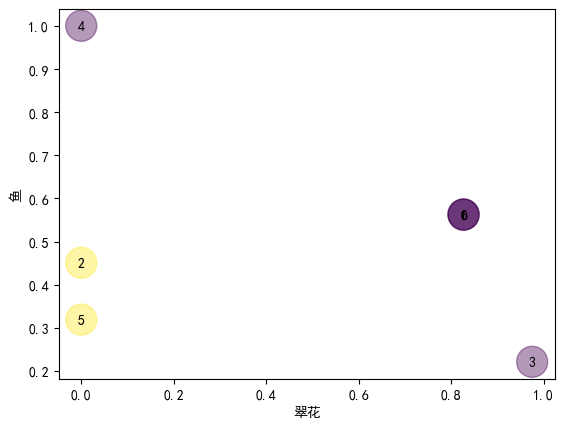

In [32]:
ax = plt.gca()

ax.scatter(df.翠花, df.鱼, c=df.category, s=500, alpha=0.4)
for i in range(len(texts)):
    print(i, texts[i])
    ax.annotate(str(i), (df.翠花[i], df.鱼[i]), ha='center', va='center')

ax.set_xlabel("翠花")
ax.set_ylabel("鱼")

plt.show()
